In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 1us/step


In [7]:
import matplotlib.pyplot as plt

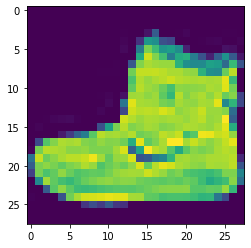

In [10]:
plt.imshow(train_data[0])

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
            train_labels,
            epochs = 10,
            validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 737us/step - loss: 2.1568 - accuracy: 0.1639 - val_loss: 1.7870 - val_accuracy: 0.2136
Epoch 2/10
1875/1875 [==============================] - 1s 671us/step - loss: 1.6997 - accuracy: 0.2536 - val_loss: 1.6468 - val_accuracy: 0.2816
Epoch 3/10
1875/1875 [==============================] - 1s 729us/step - loss: 1.6316 - accuracy: 0.2802 - val_loss: 1.6084 - val_accuracy: 0.2831
Epoch 4/10
1875/1875 [==============================] - 1s 672us/step - loss: 1.6027 - accuracy: 0.2844 - val_loss: 1.6116 - val_accuracy: 0.2896
Epoch 5/10
1875/1875 [==============================] - 1s 791us/step - loss: 1.6009 - accuracy: 0.2864 - val_loss: 1.5934 - val_accuracy: 0.2926
Epoch 6/10
1875/1875 [==============================] - 1s 737us/step - loss: 1.5897 - accuracy: 0.2952 - val_loss: 1.5774 - val_accuracy: 0.2836
Epoch 7/10
1875/1875 [==============================] - 1s 711us/step - loss: 1.5781 - accuracy: 0.3060 - val_loss: 1.5727 -

In [18]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [20]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data_norm,
            train_labels,
            epochs = 10,
            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 720us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 684us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

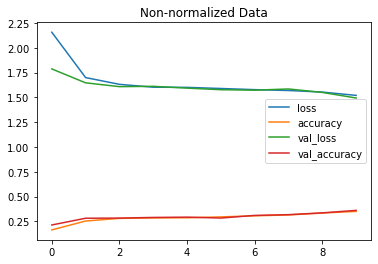

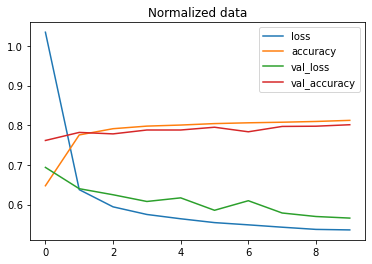

In [22]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Non-normalized Data")
pd.DataFrame(history_2.history).plot(title="Normalized data");

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

history_3 = model_3.fit(train_data_norm,
            train_labels,
            epochs = 40,
            validation_data = (test_data_norm, test_labels),
            callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 794us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 780us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 1s 743us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 2s 804us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 2s 833us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 1s 696us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 1s 696us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 -